pip install tensorflow

In [ ]:
! pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.7 kB/s 
     |████████████████████████████████| 1.6 MB 59.2 MB/s 
     |████████████████████████████████| 438 kB 72.7 MB/s 
     |████████████████████████████████| 5.8 MB 39.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [1]:
import tensorflow as tf


In [2]:
print(tf.__version__)

2.8.2


Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load DataSet

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/DL/ANN/Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X=dataset.iloc[:,3:-1]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Create Dummy Variables

In [7]:
geography =pd.get_dummies(X['Geography'],drop_first=True)


In [8]:
gender =pd.get_dummies(X['Gender'],drop_first=True)

Check the GPU type

In [ ]:
! cat /proc/cpuinfo .

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!nvidia-smi 

Mon Aug  1 03:50:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
X=pd.concat([X,geography,gender],axis=1)

In [10]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Spliting The DataSet

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler



Scaling the DataSet

In [14]:
# Feature Scaling from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train_scaled = sc.fit_transform(X_train) 
X_test_scaled = sc.transform(X_test) 

ANN

Calling DL Libraries

In [15]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import ReLU,LeakyReLU 
from tensorflow.keras.layers import Dropout 

Initializing Libraries

In [16]:
classifier= Sequential()

Adding Input Layer

In [17]:
classifier.add(Dense(units=11,activation='relu'))

Adding Hidden Layer1

In [18]:
classifier.add(Dense(units=6,activation='relu'))

Adding Hidden Layer2

In [19]:
classifier.add(Dense(units=4,activation='relu'))


Adding OutputLayer

In [20]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [21]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [29]:
model_history=classifier.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3236 - accuracy: 0.8698 - val_loss: 0.3685 - val_accuracy: 0.8482
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3236 - accuracy: 0.8684 - val_loss: 0.3667 - val_accuracy: 0.8482
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3224 - accuracy: 0.8681 - val_loss: 0.3672 - val_accuracy: 0.8527
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3225 - accuracy: 0.8711 - val_loss: 0.3683 - val_accuracy: 0.8474
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3217 - accuracy: 0.8690 - val_loss: 0.3685 - val_accuracy: 0.8497
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3213 - accuracy: 0.8696 - val_loss: 0.3701 - val_accuracy: 0.8501
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3226 - accuracy: 0.8709 - val_loss: 0.3661 - val_accuracy: 0.8501

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

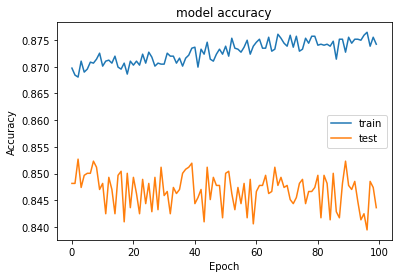

In [31]:
# Summarize history
plt.plot(model_history.history['accuracy']) 
plt.plot(model_history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train','test']) 
plt.show() 

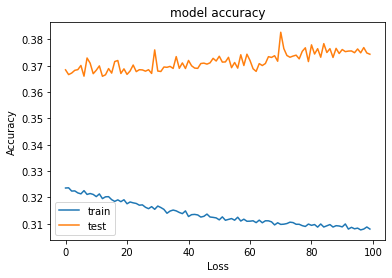

In [34]:
plt.plot(model_history.history['loss']) 
plt.plot(model_history.history['val_loss']) 
plt.title('model accuracy') 
plt.xlabel('Loss') 
plt.ylabel('Accuracy') 
plt.legend(['train','test']) 
plt.show() 

Early Stopping

In [37]:
early_stopping=tf.keras.callbacks.EarlyStopping(
     monitor="val_loss",
      min_delta=0, 
      patience=20, 
      verbose=1, 
      mode="auto"
      , baseline=None, 
      restore_best_weights=False,
       ) 

In [38]:
model_history=classifier.fit(X_train_scaled,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3076 - accuracy: 0.8731 - val_loss: 0.3737 - val_accuracy: 0.8466
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3081 - accuracy: 0.8750 - val_loss: 0.3792 - val_accuracy: 0.8444
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3071 - accuracy: 0.8768 - val_loss: 0.3766 - val_accuracy: 0.8402
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3085 - accuracy: 0.8752 - val_loss: 0.3753 - val_accuracy: 0.8444
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3079 - accuracy: 0.8744 - val_loss: 0.3745 - val_accuracy: 0.8482
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3071 - accuracy: 0.8733 - val_loss: 0.3788 - val_accuracy: 0.8516
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3074 - accuracy: 0.8744 - val_loss: 0.3762 - val_accuracy: 0.8474